# Project Name - Online Bookstore Analysis 



#### Project By :- Om Lunge



## Introduction :
The Online Bookstore Analysis Project aims to explore, analyze, and gain insights from the transactional and user-related data of an online bookstore. The project focuses on understanding customer behavior, book trends, and sales patterns to improve user experience and business decisions. By leveraging data analytics, this project will help in identifying popular genres, customer preferences, and sales performance, thereby providing actionable insights for personalized recommendations, inventory management, and marketing strategies.

### **Problem Statement:**

The online bookstore faces challenges in managing large volumes of sales data and understanding customer preferences, leading to inefficiencies in inventory management, suboptimal marketing strategies, and missed revenue opportunities. Without proper data analysis, the bookstore struggles to identify trends, predict future sales, and personalize the shopping experience. 

This project aims to analyze the bookstore’s sales data using Python to provide actionable insights into customer behavior, inventory needs, and sales trends. The goal is to optimize business operations, enhance decision-making, and improve profitability by leveraging data-driven strategies.


### Objectives :
1. **Analyze Sales Data**: Identify trends in book sales, including bestselling books, seasonal spikes, and revenue patterns.
2. **Customer Behavior Analysis**: Understand customer purchasing patterns, preferences, and average order values to tailor marketing strategies.
3. **Inventory Management**: Provide insights into stock levels, helping optimize inventory to avoid shortages or overstocking.
4. **Predict Future Sales**: Use machine learning to forecast future sales and suggest books to customers based on their buying history.
5. **Improve Decision-Making**: Facilitate data-driven strategies to enhance customer satisfaction and boost profitability.

## Importing Libraries
 Start by importing all necessary libraries. These libraries will help you with database interaction, data manipulation, and visualizations.

In [1]:
# Import essential libraries
#!pip install mysql-connector-python pandas matplotlib seaborn

import mysql.connector  # For connecting to MySQL database
import pandas as pd     # For data manipulation and analysis
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns   # For advanced visualization

## Connect to MySQL and Load Data
We connect to the MySQL database and fetch the data from the users, books, and orders tables using an SQL join query. This combined data will be used for further analysis.

In [3]:
# Establish connection to MySQL database

db_connection = mysql.connector.connect(
    
    host="localhost",              # My host
    user="root",                   # MySQL username
    password="root",               # MySQL password
    database="onlinebookstore"   # database name
    
)

## Fetching Data

#### Insight:
You have successfully pulled the combined data of users, books, and orders for further analysis.

In [4]:
# SQL query to fetch relevant data from users, books, and orders tables
query = """
SELECT 
    u.user_id AS User_ID,
    u.name AS User_Name,
    u.email AS User_Email,
    u.mobile AS User_Mobile,
    u.address AS User_Address,
    b.book_id AS Book_ID,
    b.title AS Book_Title,
    b.author AS Book_Author,
    b.price AS Book_Price,
    o.quantity AS Quantity_Ordered,
    o.order_date AS Order_Date,
    o.status AS Order_Status
FROM 
    orders o
JOIN 
    users u ON o.user_id = u.user_id
JOIN 
    books b ON o.book_id = b.book_id;
"""

# Load data into pandas DataFrame
df = pd.read_sql(query, db_connection)

# Close the connection
db_connection.close()

C:\Users\omlun\AppData\Local\Temp\ipykernel_9208\3202754113.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db_connection)


## Display the first few rows

In [5]:
df.head() # Display the first few rows of the data

,User_ID,User_Name,User_Email,User_Mobile,User_Address,Book_ID,Book_Title,Book_Author,Book_Price,Quantity_Ordered,Order_Date,Order_Status
0,1,Mayur Manwar,mayur.manwar@gmail.com,9876543210,"123 MG Road, Pune, Maharashtra",1,Shri Man Yogi,Ranjit Desai,399.99,2,2024-01-15,pending
1,2,Nikita Khadse,nikita.khadse@gmail.com,9123456789,"456 Andheri East, Mumbai, Maharashtra",3,Panipat,Vishram Bedekar,299.75,1,2024-01-16,shipped
2,3,Amit Gaikwad,amit.gaikwad@gmail.com,9998887776,"789 Civil Lines, Nagpur, Maharashtra",5,Mrityunjay,Shivaji Sawant,499.99,1,2024-01-17,delivered
3,4,Neha Shinde,neha.shinde@gmail.com,9812345678,"101 Park Street, Akola, Maharashtra",2,Swami,Ranjit Desai,349.50,3,2024-01-18,pending
4,5,Rohit Pawar,rohit.pawar@gmail.com,9976543210,"22 Gandhi Nagar, Pune, Maharashtra",4,Chhava,Shivaji Sawant,449.00,2,2024-01-19,shipped




## Column Description

1. **User_ID**: A unique identifier for each user.
2. **Name**: The name of the user.
3. **Email**: The email address of the user, which must be unique.
4. **Mobile**: The mobile phone number of the user.
5. **Address**: The residential address of the user.
6. **Book_ID**: A unique identifier for each book.
7. **Title**: The title of the book.
8. **Author**: The author of the book.
9. **Price**: The price of the book in decimal format.
10. **Stock**: The number of copies available for sale.
11. **Order_ID**: A unique identifier for each order placed.
12. **Quantity**: The number of copies of the book ordered.
13. **Order_Date**: The date when the order was placed.
14. **Status**: The current status of the order (e.g., pending, shipped, delivered).



## Exploratory Data Analysis (EDA)
Before performing any analysis, it is crucial to explore the data for missing values, data types, and descriptive statistics.

#### Data Overview

In [6]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# General information about the dataset
print("\nData Info:")
print(df.info())

# Descriptive statistics of numerical data
print("\nDescriptive Statistics:")
print(df.describe())


Missing values per column:
User_ID             0
User_Name           0
User_Email          0
User_Mobile         0
User_Address        0
Book_ID             0
Book_Title          0
Book_Author         0
Book_Price          0
Quantity_Ordered    0
Order_Date          0
Order_Status        0
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           50 non-null     int64  
 1   User_Name         50 non-null     object 
 2   User_Email        50 non-null     object 
 3   User_Mobile       50 non-null     object 
 4   User_Address      50 non-null     object 
 5   Book_ID           50 non-null     int64  
 6   Book_Title        50 non-null     object 
 7   Book_Author       50 non-null     object 
 8   Book_Price        50 non-null     float64
 9   Quantity_Ordered  50 non-null     int64  
 10  Order_Date  

### Insight 
* Missing Values: Identify if any column has missing data.
* Data Types: Ensure columns have appropriate data types (e.g., dates should be datetime).
* Descriptive Stats: Get insights into numeric columns such as prices and quantities.


 ## Data Cleaning
Once Once we have the data, it’s time to clean it by handling missing values, removing duplicates, and ensuring the correct data types.

### Checking for Missing Values

In [8]:
# Check for missing values in the dataset
df.isnull().sum()


User_ID             0
User_Name           0
User_Email          0
User_Mobile         0
User_Address        0
Book_ID             0
Book_Title          0
Book_Author         0
Book_Price          0
Quantity_Ordered    0
Order_Date          0
Order_Status        0
dtype: int64

### Check Duplicates Value 
Sometimes, data can have duplicate rows that skew results. Detect and remove them.

In [9]:
# Check for duplicates
print(df.duplicated().sum())


0


### Remove duplicate Value

In [11]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


## Data Analysis and Visualization

### 1. Total Revenue per Book
Calculate and visualize the total revenue generated by each book.

Top 5 Books by Total Revenue:
            Book_Title  Total_Revenue
0       A Fine Balance        1499.97
40     The Last Mughal        1499.97
14  India After Gandhi        1497.00
31               Swami        1048.50
29                Shiv         999.98


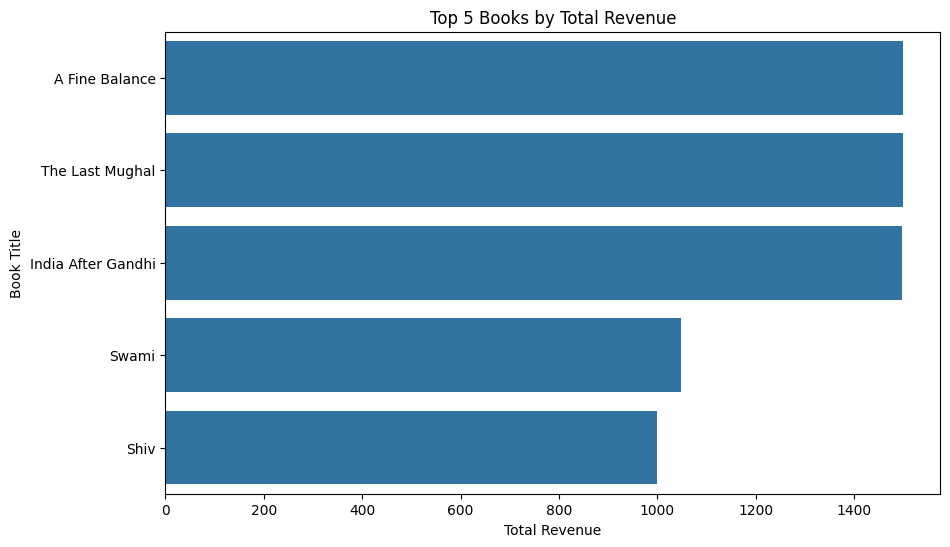

In [12]:
# Calculate total revenue for each book
df['Total_Revenue'] = df['Quantity_Ordered'] * df['Book_Price']
revenue_per_book = df.groupby('Book_Title')['Total_Revenue'].sum().reset_index()

# Sort books by revenue and display top 5
top_books = revenue_per_book.sort_values(by='Total_Revenue', ascending=False).head(5)
print("Top 5 Books by Total Revenue:")
print(top_books)

# Visualize top 5 books by revenue
plt.figure(figsize=(10,6))
sns.barplot(x='Total_Revenue', y='Book_Title', data=top_books)
plt.title('Top 5 Books by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Book Title')
plt.show()


### Insight:
The visualization reveals which books contribute the most revenue, allowing you to focus on promoting high-revenue books.

### 2. Order Status Distribution
Analyze the distribution of order statuses to understand the overall state of order fulfillment.

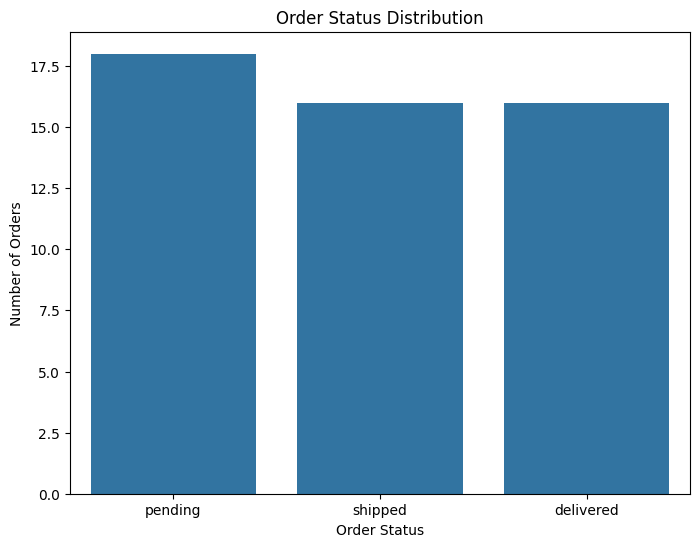

In [13]:
# Analyze order status distribution
order_status_count = df['Order_Status'].value_counts()

# Plot order status distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Order_Status', data=df)
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.show()


#### Insight:
This analysis highlights how many orders are pending, shipped, or delivered, helping identify bottlenecks in the order process.



### 3. Monthly Sales Trend
Investigate how sales have evolved over time by aggregating data on a monthly basis.

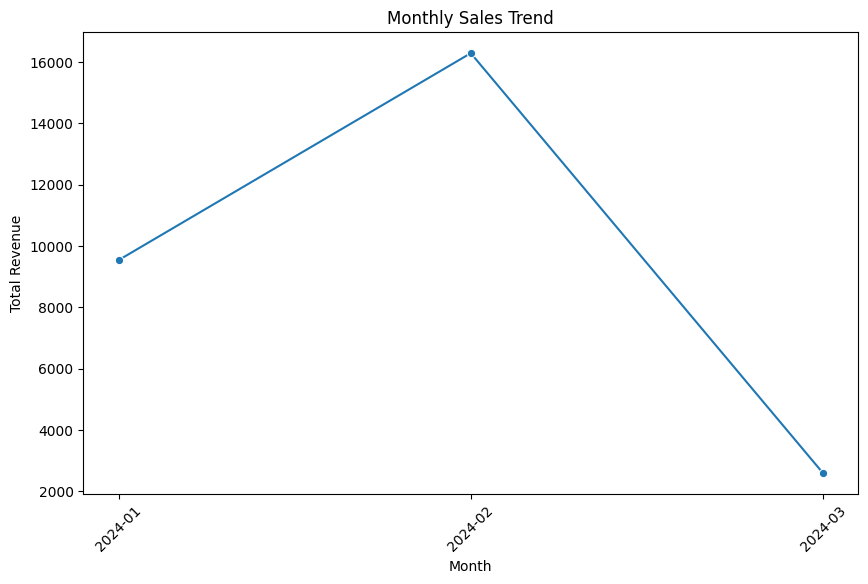

In [16]:
# Ensure 'Order_Date' is in datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Ensure 'Total_Revenue' is numeric
df['Total_Revenue'] = pd.to_numeric(df['Total_Revenue'], errors='coerce')

# Extract month from 'Order_Date' as string (e.g., '2023-09')
df['Month'] = df['Order_Date'].dt.strftime('%Y-%m')

# Group by month to calculate total monthly revenue
monthly_sales = df.groupby('Month')['Total_Revenue'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Total_Revenue', marker='o', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


#### Insight:
The monthly sales trend helps identify peak sales periods, which can guide stock management and promotional activities.



### 4. Top 5 Users by Number of Orders
Identify the top 5 users who placed the highest number of orders.

Top 5 Users by Number of Orders:
          User_Name  Quantity_Ordered
13      Kabir Mehta                 3
6       Anjali More                 3
39       Shreya Sen                 3
48  Vikram Kulkarni                 3
49       Vivek Iyer                 3


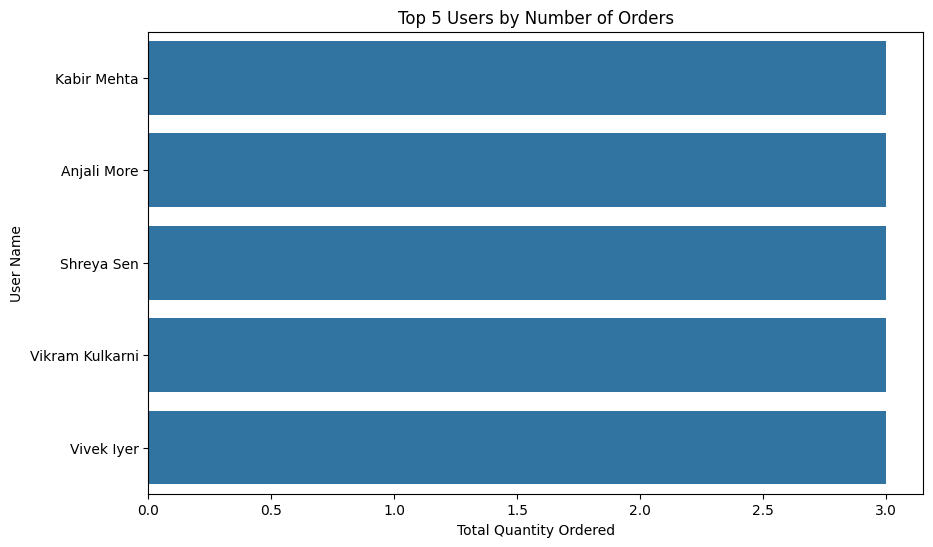

In [21]:
# Group by users and calculate total quantity ordered
top_users = df.groupby('User_Name')['Quantity_Ordered'].sum().reset_index().sort_values(by='Quantity_Ordered', ascending=False).head(5)

print("Top 5 Users by Number of Orders:")
print(top_users)

# Visualize top 5 users by the number of orders
plt.figure(figsize=(10,6))
sns.barplot(x='Quantity_Ordered', y='User_Name', data=top_users)
plt.title('Top 5 Users by Number of Orders')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('User Name')
plt.show()


#### Insight:
Recognizing top customers enables personalized marketing, enhancing customer loyalty and retention strategies.

### 5. Top 10 Books by Revenue

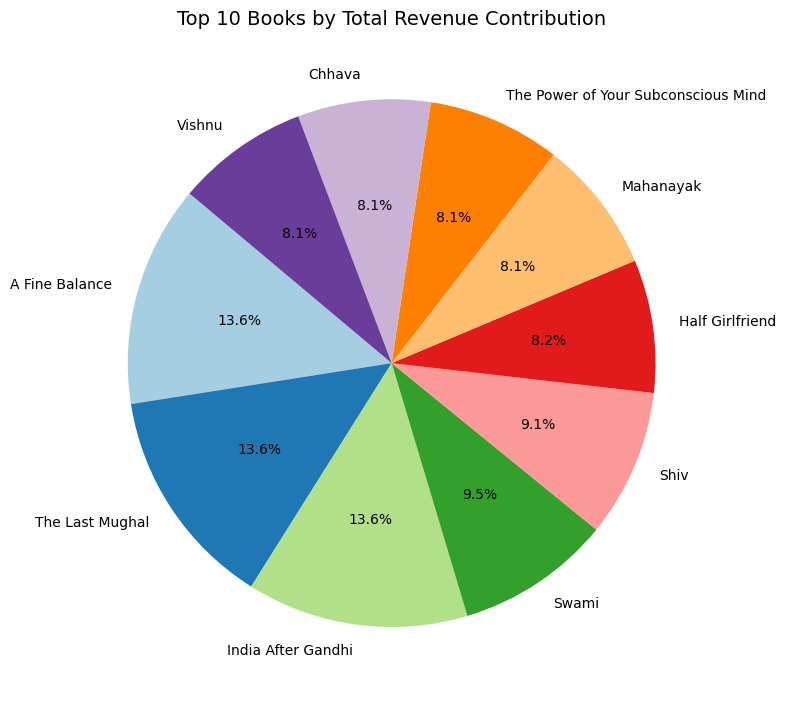

In [9]:


# Group the data by Book_Title and sum Quantity_Ordered and calculate Total_Revenue
book_sales = df.groupby('Book_Title').agg({'Quantity_Ordered': 'sum', 'Book_Price': 'mean'}).reset_index()
book_sales['Total_Revenue'] = book_sales['Quantity_Ordered'] * book_sales['Book_Price']

# Sort by Total Revenue and select the top 10 books
top_10_revenue_books = book_sales.sort_values(by='Total_Revenue', ascending=False).head(10)

# Create a pie chart for the top 10 books by total revenue
plt.figure(figsize=(8,8))
plt.pie(top_10_revenue_books['Total_Revenue'], labels=top_10_revenue_books['Book_Title'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Top 10 Books by Total Revenue Contribution', fontsize=14)

# Display the pie chart
plt.tight_layout()
plt.show()


### Insight:
The visualization highlights the top revenue-generating books, enabling you to focus your efforts on promoting these high-revenue titles to maximize sales and profitability.

### 6. Revenue Contribution by User
Analyze the total revenue contribution by the top 5 users.

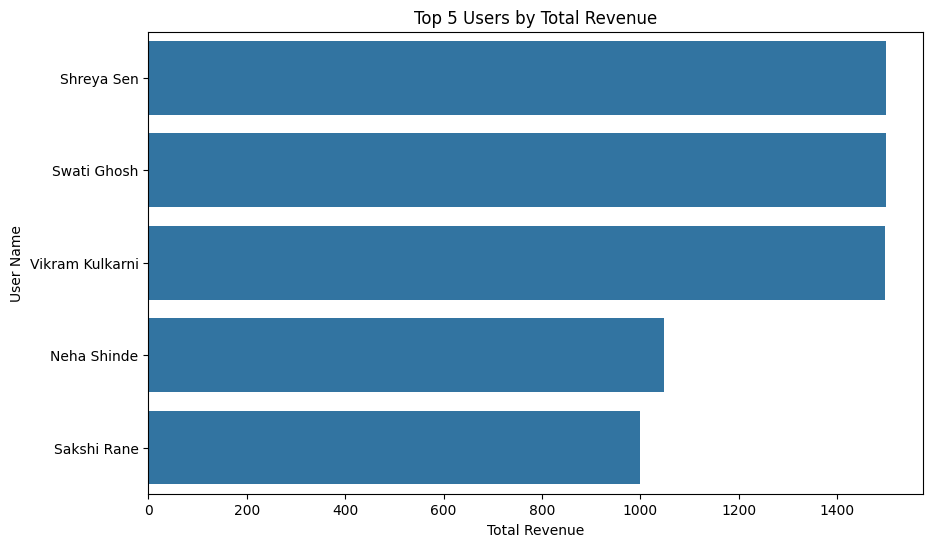

In [22]:
# Group by users and calculate total revenue
user_revenue = df.groupby('User_Name').agg({'Quantity_Ordered': 'sum', 'Total_Revenue': 'sum'}).reset_index()

# Display top 5 users by total revenue
top_users_revenue = user_revenue.sort_values(by='Total_Revenue', ascending=False).head(5)

# Visualize top 5 users by total revenue
plt.figure(figsize=(10,6))
sns.barplot(x='Total_Revenue', y='User_Name', data=top_users_revenue)
plt.title('Top 5 Users by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('User Name')
plt.show()


####  Insight:
The revenue contribution analysis helps businesses identify high-value customers and tailor offers to maximize sales and engagement.



## Conclusion

The analysis reveals that the bookstore's revenue is heavily influenced by a small number of top-selling books and a limited group of high-value customers. To sustain and enhance growth, the bookstore should focus on diversifying its inventory to mitigate risks associated with over-reliance on bestsellers. Additionally, improving customer retention strategies will help capitalize on loyal buyers. Addressing any inefficiencies in order fulfillment is essential for maintaining customer satisfaction. Finally, leveraging insights from sales trends can guide effective marketing efforts and resource allocation.

## Future Scope

* Personalized Recommendations: Use AI for book suggestions based on user preferences.
* Mobile App Development: Create a mobile app for wider accessibility.
* Advanced Search: Improve search with better filters and natural language processing.
* Global Expansion: Add multi-language and multi-currency support.
* E-books and Audiobooks: Integrate with platforms offering digital content.
* Subscription Plans: Introduce membership or subscription models.
* AI Chatbot: Implement AI chatbots for customer support and recommendations.
* Community Features: Add social features like reviews, discussions, and book clubs.
* Data Analytics: Leverage analytics for insights on user behavior and trends.